# ChaosMagPy

> Package authors: Clemens Kloss et al.


## Resources

Python package: `chaosmagpy`  
[Code](https://github.com/ancklo/ChaosMagPy)  
[Documentation](https://chaosmagpy.readthedocs.io/)  
[Project page](http://www.spacecenter.dk/files/magnetic-models/CHAOS-7/)  
[Swarm Data Handbook](https://swarmhandbook.earth.esa.int/catalogue/SW_MCO_SHA_2X)

Finlay, C.C., Kloss, C., Olsen, N., Hammer, M. Toeffner-Clausen, L., Grayver, A and Kuvshinov, A. (2020), The CHAOS-7 geomagnetic field model and observed changes in the South Atlantic Anomaly, Earth Planets and Space 72, doi:10.1186/s40623-020-01252-9

In [1]:
%load_ext watermark
%watermark -i -v -p chaosmagpy,numpy,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

chaosmagpy: 0.12
numpy     : 1.26.2
matplotlib: 3.8.2



## Example usage

First we need to get the model coefficients, which can be downloaded from http://www.spacecenter.dk/files/magnetic-models/CHAOS-7/. One way to do this is to use [Pooch](https://www.fatiando.org/pooch/):

In [2]:
%pip install pooch --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pooch

chaos_matfile = pooch.retrieve(
    "http://www.spacecenter.dk/files/magnetic-models/CHAOS-7/CHAOS-7.15.mat",
    known_hash="4a074dd48674eafd076fb95ac05cd1e3e034c2eb6bfe5ee3f566e3764c43bb80"
)

The file, `chaos_matfile`, is cached by pooch so we can use it below to drive the forward code for the CHAOS model.

In [4]:
import numpy as np
import chaosmagpy as cp

# create full grid
radius = 3485.  # km, core-mantle boundary
theta = np.linspace(0., 180., num=181)  # colatitude in degrees
phi = np.linspace(-180., 180., num=361)  # longitude in degrees

phi_grid, theta_grid = np.meshgrid(phi, theta)
radius_grid = radius*np.ones(phi_grid.shape)

time = cp.data_utils.mjd2000(2000, 1, 1)  # modified Julian date

# create a "model" instance by loading the CHAOS model from a mat-file
model = cp.load_CHAOS_matfile(chaos_matfile)

# compute field components on the grid using the method "synth_values_tdep"
B_radius, B_theta, B_phi = model.synth_values_tdep(time, radius_grid, theta_grid, phi_grid)

B_radius

/opt/conda/lib/python3.11/site-packages/chaosmagpy/model_utils.py:498: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


array([[   13114.07514909,    13114.07514909,    13114.07514909, ...,
           13114.07514909,    13114.07514909,    13114.07514909],
       [-1449320.39404283, -1453699.60257631, -1457572.82798105, ...,
        -1439043.80204562, -1444435.08443306, -1449320.39404283],
       [-2912809.28970337, -2918215.94338028, -2922448.49913027, ...,
        -2898465.05490008, -2906226.1626899 , -2912809.28970337],
       ...,
       [  495526.26162097,   502429.10541553,   509334.33214343, ...,
          481771.29174873,   488636.70118503,   495526.26162097],
       [  456773.00500448,   457899.48203267,   459013.0937009 , ...,
          454491.55004206,   455636.18958722,   456773.00500448],
       [  365331.11634583,   365331.11634583,   365331.11634583, ...,
          365331.11634583,   365331.11634583,   365331.11634583]])

We can use the built-in tools for visualising the model appropriately:

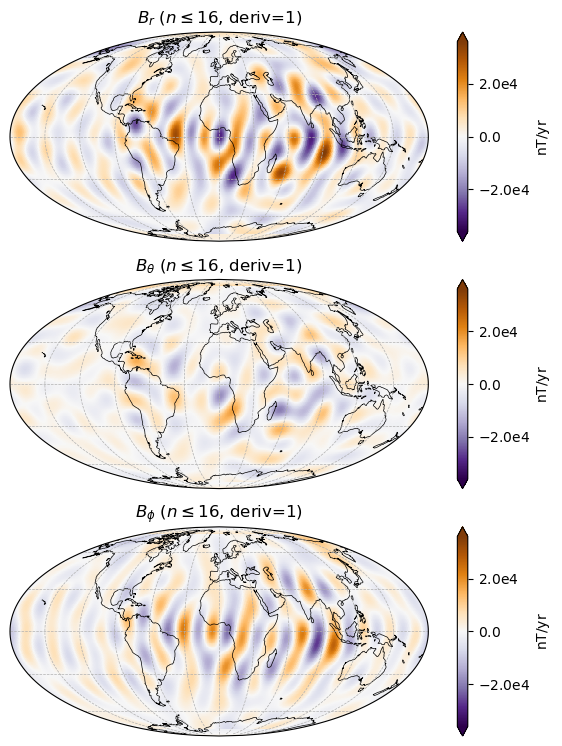

In [5]:
model = cp.load_CHAOS_matfile(chaos_matfile)

radius = 3485.0  # km, here core-mantle boundary
time = 0.0  # mjd2000, here Jan 1, 2000 0:00 UTC

model.plot_maps_tdep(time, radius, nmax=16, deriv=1)  # plots the SV up to degree 16

For more, see https://chaosmagpy.readthedocs.io/en/master/usage.html